In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
import os
os.getcwd()

'e:\\Projects\\ThyroidDiseasePrediction\\notebook'

In [35]:
df = pd.read_csv("data/thyroidDF.csv")

In [36]:
df.head(15)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


In [37]:
df.shape

(9172, 31)

According to the description of the dataset given columns like 'TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured' indicates whether the particular quantity was measured in blood or not and hence its not important.  
Also 'patient_id' and 'referral_source' are irrelevant columns 

In [38]:
columns_to_be_dropped = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','patient_id','referral_source']
df.drop(columns = columns_to_be_dropped, axis=1, inplace=True)

In [39]:
categorical_columns = [
    'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 
    'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
    'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
]
df[categorical_columns] = df[categorical_columns].replace({'t': 'True', 'f': 'False'})

df['sex'] = df['sex'].replace({'F':'Female','M':'Male'})


In [40]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,Female,False,False,False,False,False,False,False,True,...,False,False,False,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,Female,False,False,False,False,False,False,False,False,...,False,False,False,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,Female,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,Female,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,Female,False,False,False,False,False,False,False,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,36.0,S


In [41]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

Remapping the target values to their original categories

In [42]:
# df.isna().sum()
results = {
    '-' : 'negative',
    'A' : 'hyperthyroid',
    'B' : 'hyperthyroid',
    'C' : 'hyperthyroid',
    'D' : 'hyperthyroid',
    'E' : 'hypothyroid',
    'F' : 'hypothyroid',
    'G' : 'hypothyroid',
    'H' : 'hypothyroid',
    
}
df['target'] = df['target'].map(results)

In [43]:
df['target'].unique()

array(['negative', nan, 'hypothyroid', 'hyperthyroid'], dtype=object)

Dropping NULL values in the target column 

In [44]:
df.dropna(subset=['target'], inplace=True) 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   object

In [46]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


Observations: 
1. Age: The max age is too unrealistic hence indicating potential outliers and mean age i.e 78 is also quite high.
2. TBG has many missing values as the count is very much lower than other features.
3. TSH may also have many outliers as the max value i.e 530 is too high as compared to min vale i.e 0.005 and mean value i.e 5.42.


1. There are 4 rows with age > 100 . Therfore replacing them with null values and further imputing them with the median of the age column.

In [47]:
df[df['age']>100]
df['age']=np.where((df['age']>100),np.nan , df.age)
df['age'].fillna(round(df['age'].median(),0), inplace=True)
df['age']=df['age'].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   object

# EDA

In [49]:
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
categorical_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
                        'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 
                        'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 
                        'tumor', 'hypopituitary', 'psych','target']

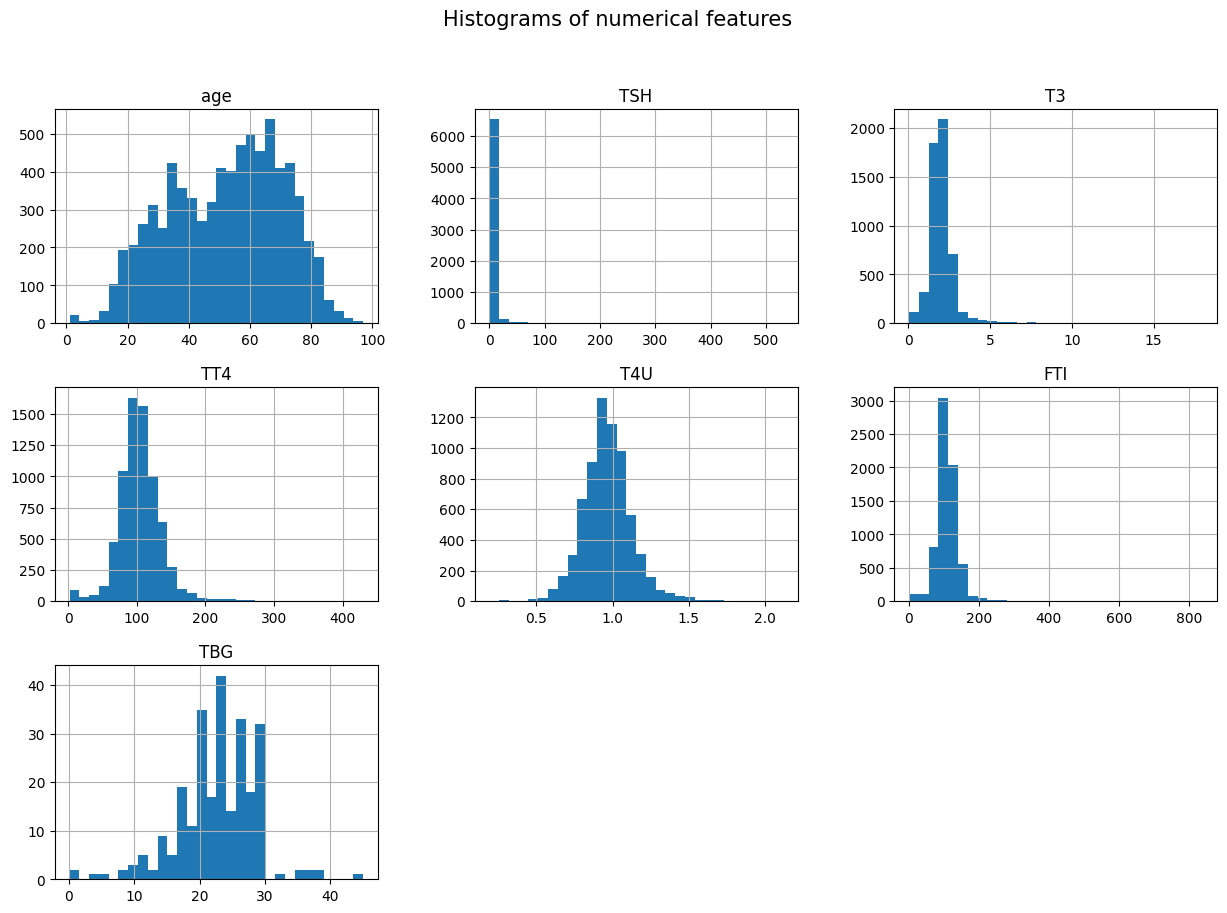

In [50]:
# histograms for the numerical features.
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of numerical features', fontsize=15)
plt.show()

Observations:
1. TSH , T3 ,FTI -> highly skewed to the right therefore will try applying **z-score tranformation**.
2. T4U -> approximately normal distribution.
3. TBG -> irregular distribution due to lower count than other features therfore we will consider dropping this feature too.

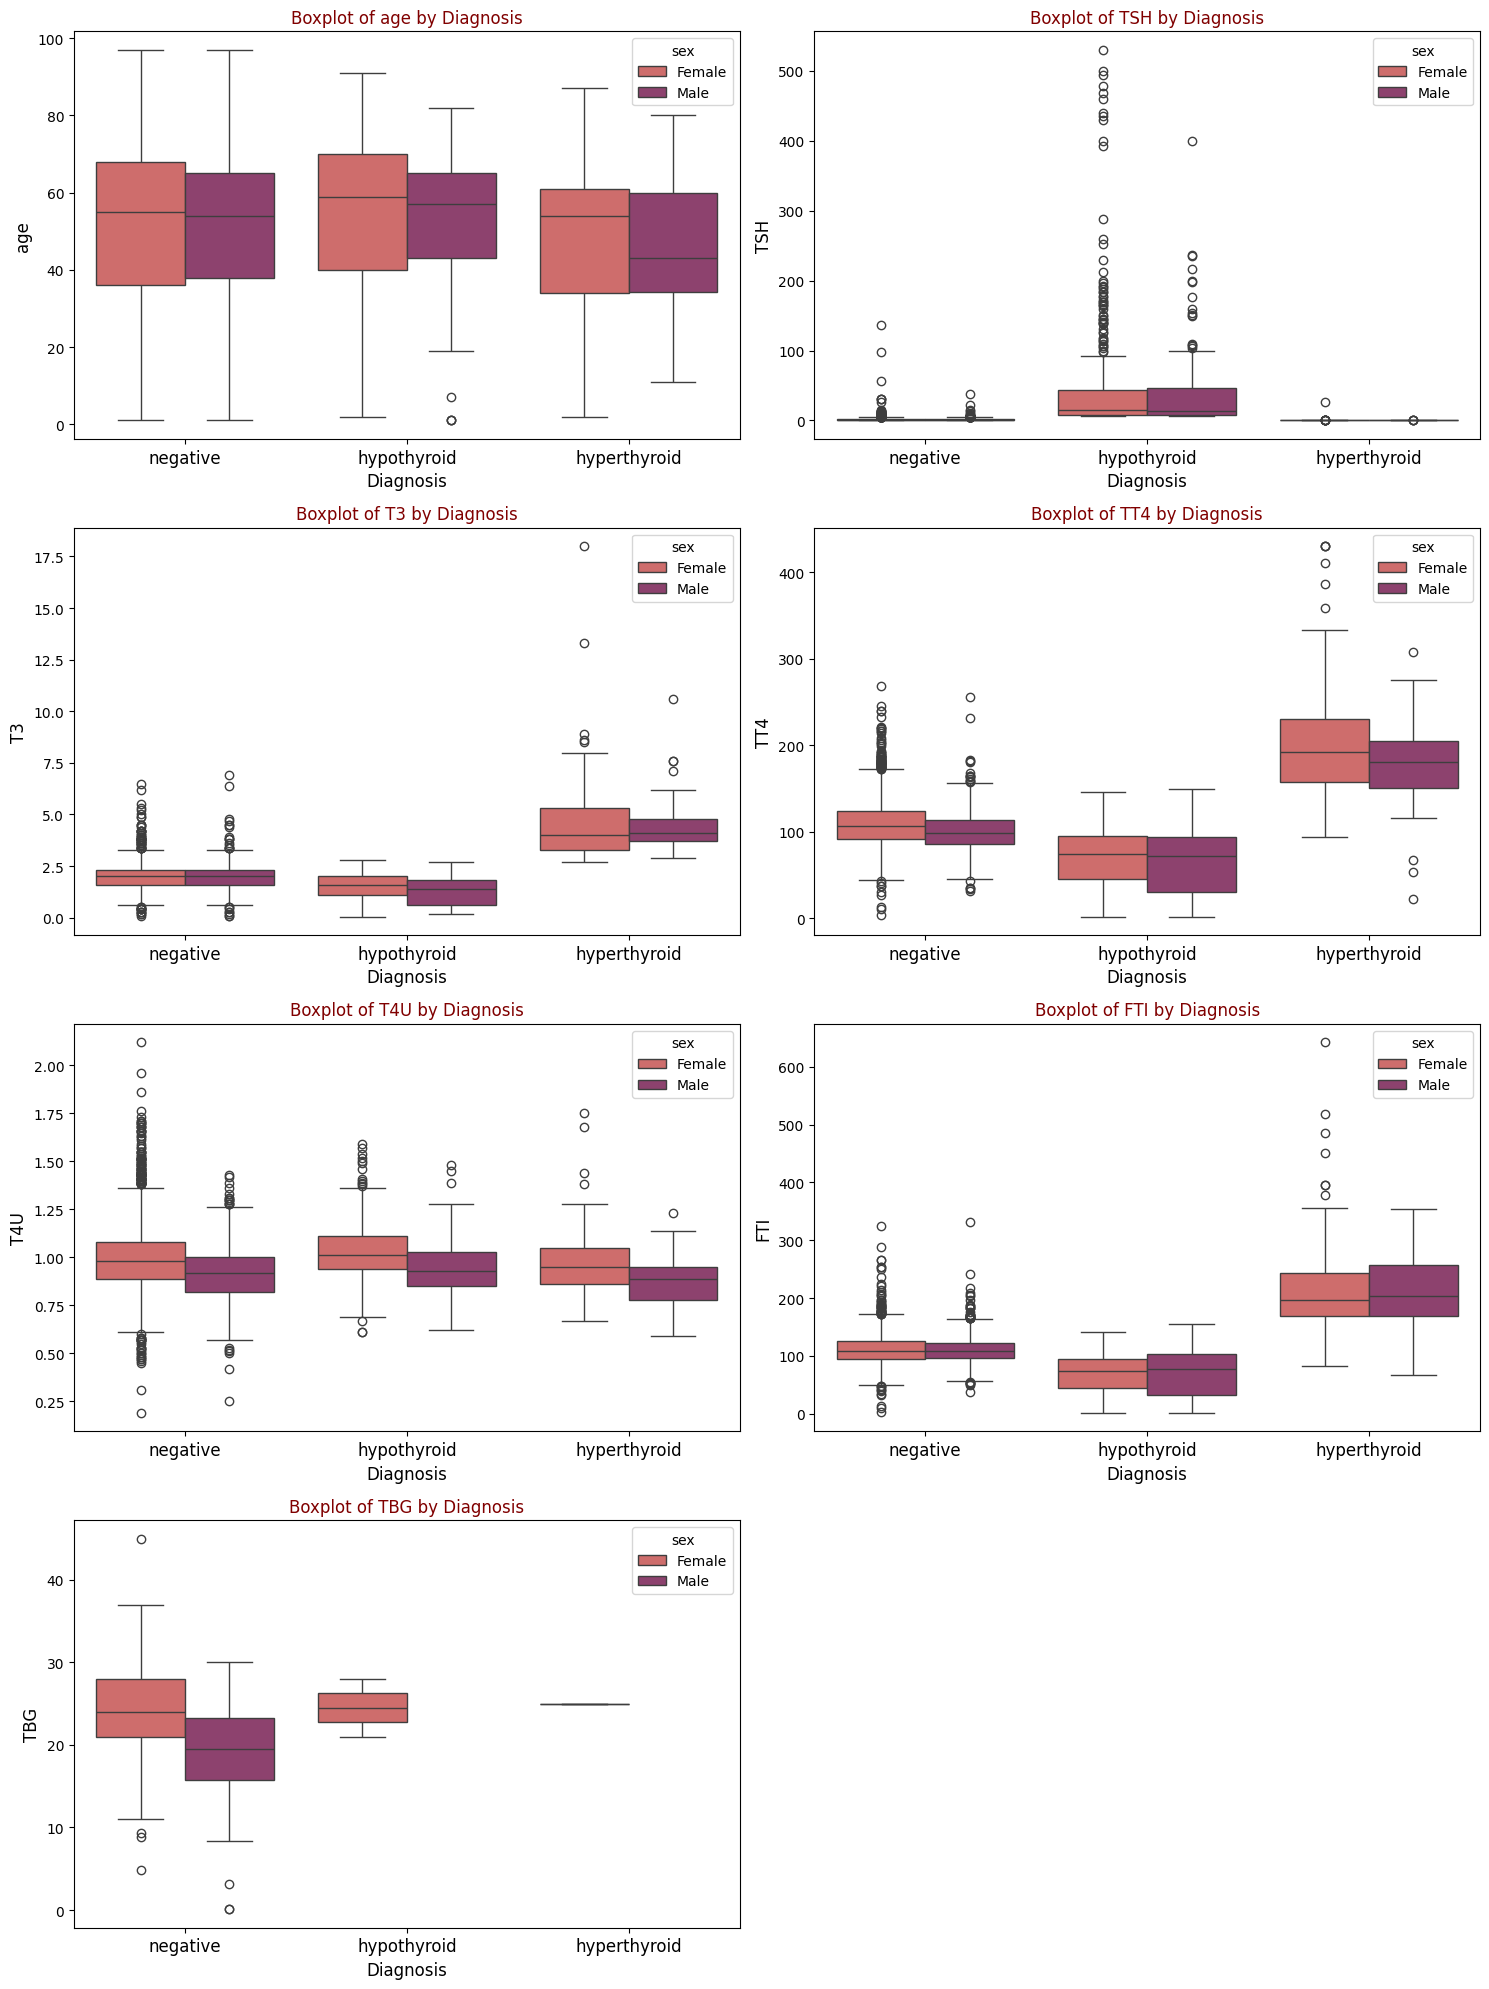

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    if i < len(axes):  # Check to avoid index error
        sns.boxplot(x='target', y=feature, hue='sex', data=df, ax=axes[i], palette='flare')
        axes[i].set_title(f'Boxplot of {feature} by Diagnosis',fontsize=12 , color = '#800000')
        axes[i].set_xlabel('Diagnosis',fontsize=12)
        axes[i].set_ylabel(feature,fontsize=12)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=12)
        

fig.delaxes(axes[-1]) # removing the last empty subplot
plt.tight_layout()
plt.show()

<h3>Observation: </h3>
<ol>
<li>Age: Consistent distribution across three categories.</li>
<li>TSH: Hypothyroid patients have higher TSH levels</li>
<li>T3,TT4 ,FTI : These levels are higher in hyperthyroid patients as compared to hypothyroid patients.</li>
<li>T4U: consistent across all the categories.</li>
</ol>
<h3>General:</h3>
<ol>
<li>Slight difference in the distributions of males and females.</li>
<li>Diagnosis Patterns:</li>
<ul>
<li>Hypothyroid patients tend to have higher TSH and lower T3, TT4, and FTI levels.</li>
<li>Hyperthyroid patients tend to have higher T3, TT4, and FTI levels, and lower TSH levels.</li>
</ul>
</ol>

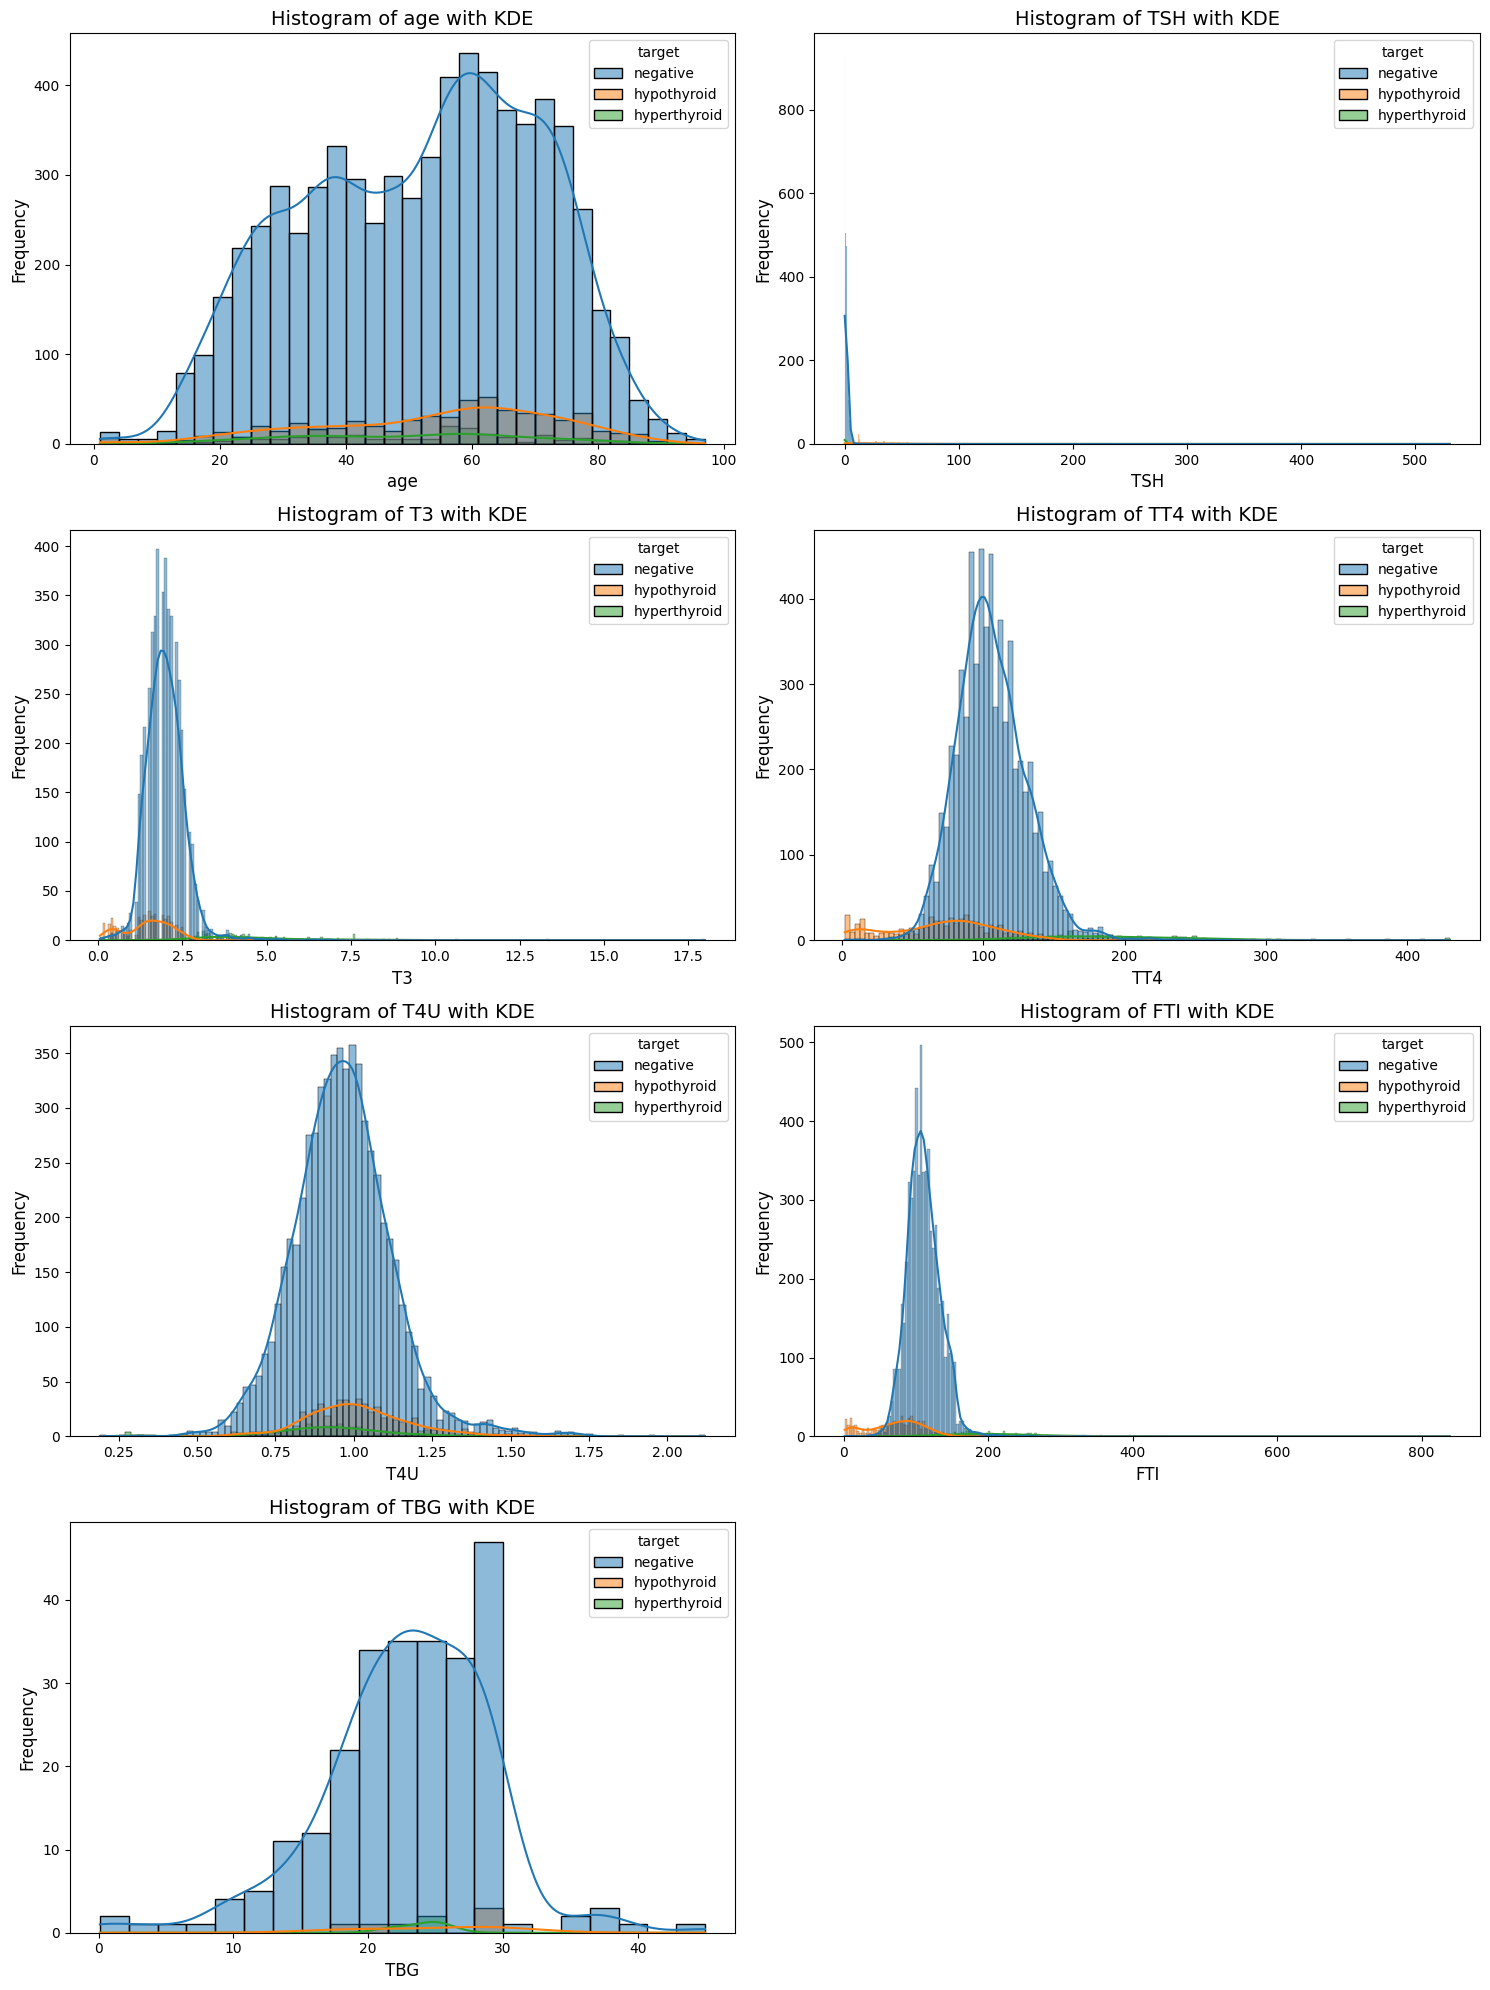

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axes = axes.flatten()
# sns.color_palette("viridis", as_cmap=True)

for i, feature in enumerate(numerical_features):
    if i < len(axes): 
        sns.histplot(data = df,x=feature,hue='target', kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {feature} with KDE', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)

fig.delaxes(axes[-1]) # remove the last subplot
plt.tight_layout()
plt.show()


In [53]:
# ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
df.isna().sum()

age                       0
sex                     250
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     722
T3                     2209
TT4                     354
T4U                     676
FTI                     669
TBG                    7287
target                    0
dtype: int64

<h3>Handling missing values</h3>

In [54]:
#for the sex column
def replace_sex(row):
    if pd.isna(row['sex']):
        if row['pregnant'] == 'True':
            return 'Female'
        else:
            return 'Male'
    else:
        return row['sex']

df['sex'] = df.apply(replace_sex, axis=1)

In [55]:
df.isna().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     722
T3                     2209
TT4                     354
T4U                     676
FTI                     669
TBG                    7287
target                    0
dtype: int64

In [56]:
# dropping TBG column
df.drop('TBG',axis=1,inplace=True)

In [57]:
columns_to_check = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Drop rows with 2 or more missing values in the specified columns
df = df.dropna(thresh=len(columns_to_check)-1, subset=columns_to_check)

# replacing remaining missing values with 0
df= df.fillna(0)

Missing values have been handled.

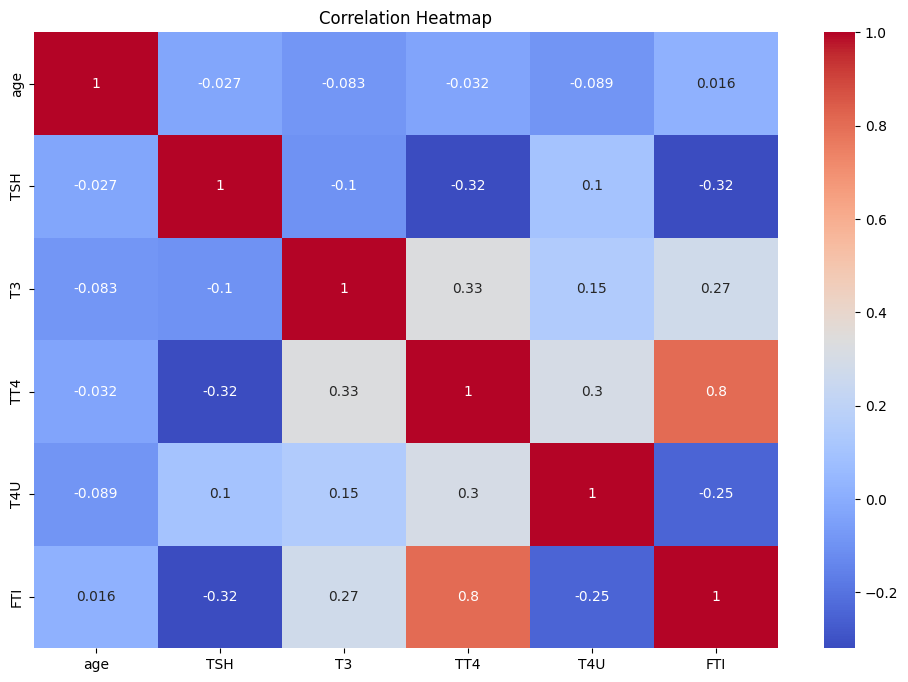

In [58]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

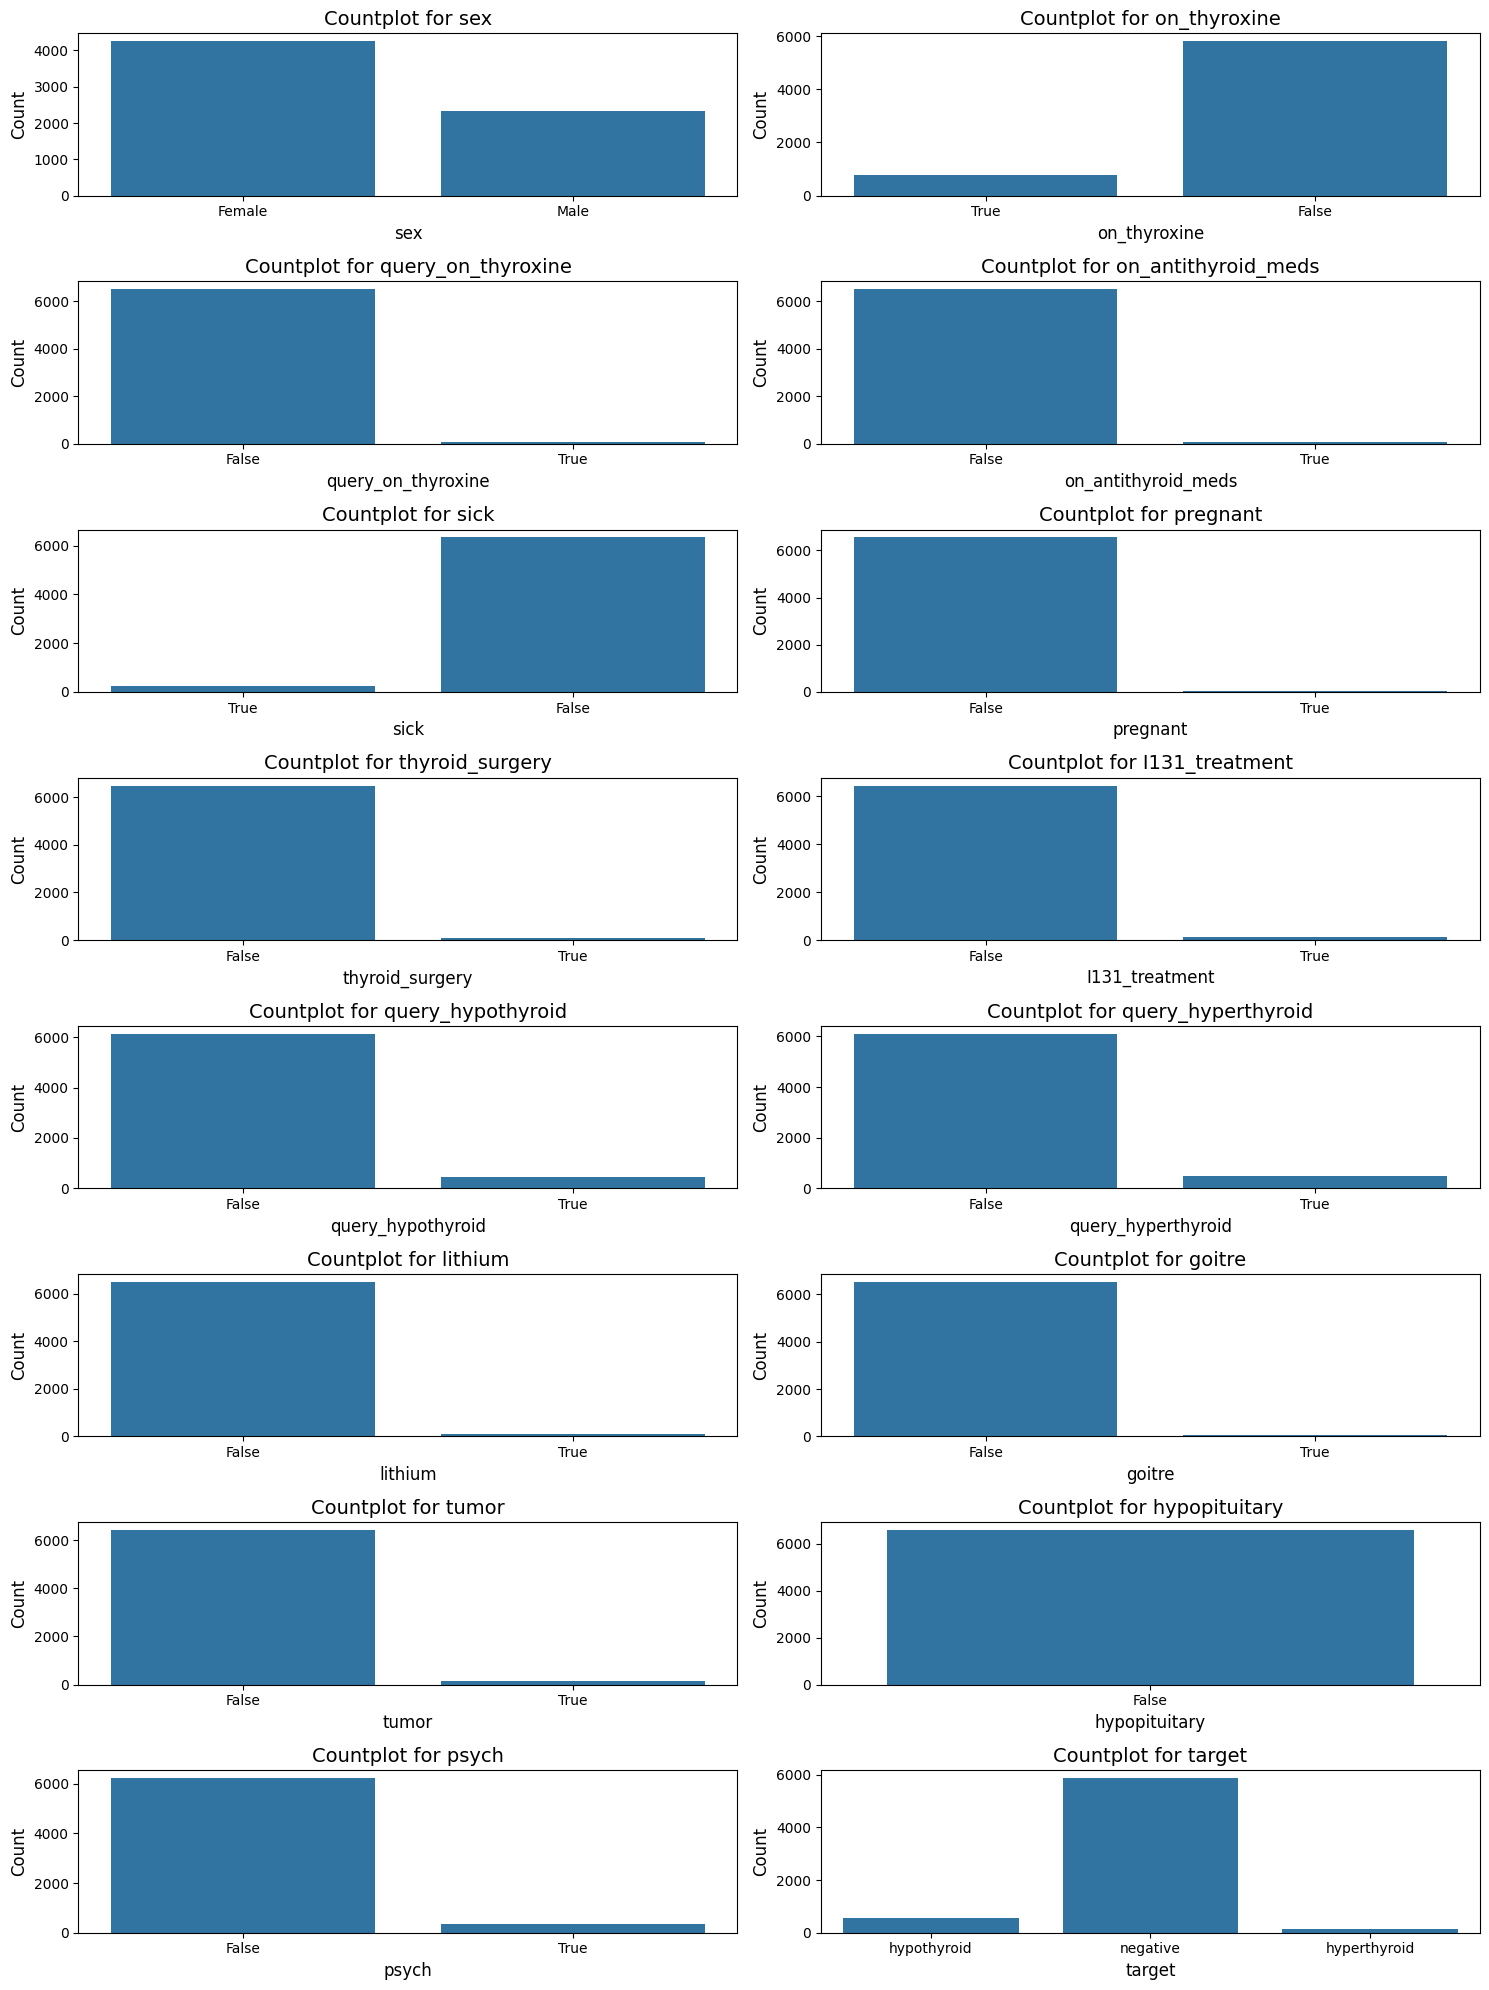

In [59]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axes = axes.flatten()

for i, col in enumerate(categorical_features):
    if i < len(axes): 
        sns.countplot(x=col, data=df,ax=axes[i])
        axes[i].set_title(f"Countplot for {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

Columns other than "sex" column have mostly "False" value for the instances . Hence dropping these as it wont effect the prediction.

In [60]:
cols_to_be_dropped = ['on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']
df.drop(columns=cols_to_be_dropped,inplace=True)

In [61]:
df.to_csv('data/cleaned_data.csv', index=False)
pd.read_csv('data/cleaned_data.csv')

,age,sex,TSH,T3,TT4,T4U,FTI,target
0,63,Female,68.00,0.0,48.0,1.02,47.0,hypothyroid
1,36,Female,1.50,2.4,90.0,1.06,85.0,negative
2,40,Female,1.20,2.3,104.0,1.08,96.0,negative
3,40,Female,5.90,2.1,88.0,0.84,105.0,negative
4,77,Female,0.05,2.4,107.0,1.13,95.0,negative
...,...,...,...,...,...,...,...,...
6579,84,Female,0.34,0.0,105.0,0.93,113.0,negative
6580,80,Male,3.30,0.0,111.0,0.92,121.0,negative
6581,16,Male,2.60,0.0,122.0,0.86,142.0,negative
6582,54,Male,1.10,0.0,105.0,0.82,128.0,negative
